scikit-learn, Machine Learning in Python
- Simple and efficient tools for predictive data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license


Check also: 
- https://scikit-learn.org/stable/index.html
- https://scikit-learn.org/stable/modules/tree.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
np.random.seed(42)

Solution of the previous `Hands on`

In [2]:
def preprocess(normalize=True):
    df = pd.read_csv("datasets/housing.csv", delimiter=",")
    
    num_df = df.drop(columns=["ocean_proximity", "median_house_value"])

    # Filling in (i.e., impute) missing values with the median value 
    num_df["total_bedrooms"] = num_df["total_bedrooms"].fillna(num_df["total_bedrooms"].median())

    # Add a new column: population_per_household = population / households
    num_df["population_per_household"] = num_df["population"] / num_df["households"]

    # Add a new column: rooms_per_household = total_rooms / households
    num_df["rooms_per_household"] = num_df["total_rooms"] / num_df["households"]

    # Add a new column: bedrooms_per_room = total_bedrooms / total_rooms
    num_df["bedrooms_per_room"] = num_df["total_bedrooms"] / num_df["total_rooms"]

    if normalize:
        # Apply standardization to all the numeric columns
        num_df = (num_df - num_df.mean()) / num_df.std()

    # One hot encode `ocean_proximity` since it is a categorical attribute 
    cat_df = pd.get_dummies(df["ocean_proximity"], prefix='ocean_proximity')

    return pd.concat([num_df, cat_df, df[["median_house_value"]]], axis=1) # do not change this line

df = preprocess()

For a supervised learning problem we need:
- input data along with labels
- split data between test and training set

In [3]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

df_train, df_test = split_train_test(df, 0.2)
X_train = df_train.drop(columns=["median_house_value"]).to_numpy()
X_test  = df_test.drop(columns=["median_house_value"]).to_numpy()
y_train = df_train["median_house_value"].to_numpy()
y_test  = df_test["median_house_value"].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split
y = df["median_house_value"] # labels
X = df.drop(columns=["median_house_value"]) # input data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,population_per_household,rooms_per_household,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5088,0.643716,-0.773361,-0.765917,-0.803424,-0.533722,-0.617660,-0.582062,-1.521075,-0.043300,-0.905868,2.156065,1,0,0,0,0
17096,-1.327803,0.855889,0.346470,0.003317,-0.173677,-0.362464,-0.189731,0.185559,-0.066782,0.307455,-0.586009,0,0,0,0,1
5617,0.653698,-0.862314,1.061575,-0.675538,-0.650558,-0.336856,-0.676222,-0.169422,0.121441,-0.245505,0.205376,1,0,0,0,0
20060,0.154579,0.111491,-0.368636,-0.479353,-0.350123,0.230050,-0.333586,-1.170516,0.140728,-0.466744,0.482602,0,1,0,0,0
895,-1.193041,0.893343,-1.163197,1.132297,1.597935,1.159000,1.591454,0.063284,-0.057725,-0.331705,0.346285,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.803433,-0.866996,0.505382,-0.598530,-0.800776,-0.677706,-0.738995,1.315560,-0.003697,0.282936,-0.960430,1,0,0,0,0
11964,1.067966,-0.754634,0.346470,0.205461,0.079070,0.289213,-0.132189,-0.431973,0.080259,0.581850,-0.443985,0,1,0,0,0
5390,0.593804,-0.749952,0.584838,-0.245123,0.076685,0.291863,0.071824,-0.492820,0.025170,-0.582935,0.874037,1,0,0,0,0
860,-1.193041,0.912070,-1.083741,0.430524,0.143449,0.310406,0.155521,0.973001,0.010421,0.390575,-0.717278,1,0,0,0,0


In [6]:
y_train

5088     121400.0
17096    363700.0
5617     205600.0
20060     47600.0
895      236000.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 13828, dtype: float64

Apply linear regression to forecast housing values

70532.346029265


<AxesSubplot:>

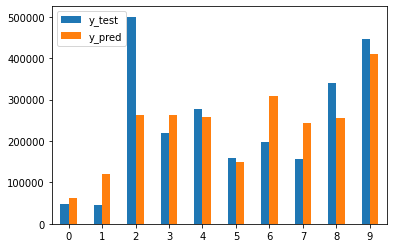

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # initialize the model
lin_reg.fit(X_train, y_train) # train it
housing_predictions = lin_reg.predict(X_test) # predict the cost of houses in the test set
lin_mse = mean_squared_error(y_test, housing_predictions) # check the error
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse) # print it

df = pd.DataFrame({'y_test': y_test[:10].to_numpy(), 'y_pred': housing_predictions[:10]}, index=[x for x in range(10)])
df.plot.bar(rot=0)

This is better than nothing, but clearly not a great score: most districts’ `median_housing_values` range between 120K USD and  265K USD, so a typical prediction error of ~70K USD is not very satisfying. This is an example of a model underfitting the training
data.

50155.05753085368


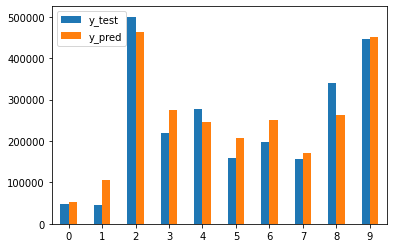

In [8]:
from sklearn.ensemble import RandomForestRegressor

def run_forest(n_estimators, max_features):
    forest_reg = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, random_state=42) # initialize the model
    forest_reg.fit(X_train, y_train) # train it
    housing_predictions = forest_reg.predict(X_test) # predict the cost of houses in the test set
    forest_rmse = mean_squared_error(y_test, housing_predictions, squared=True) # check the error
    forest_rmse = np.sqrt(forest_rmse)
    print(forest_rmse)
    df = pd.DataFrame({'y_test': y_test[:10].to_numpy(), 'y_pred': housing_predictions[:10]}, index=[x for x in range(10)])
    df.plot.bar(rot=0)
    return forest_reg
forest_reg = run_forest(100, "auto")

Look at parameters used by our current forest

In [9]:
forest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [10]:
from sklearn.model_selection import RandomizedSearchCV 
# Number of trees in random forest
n_estimators = [50, 100, 150]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
random_grid = {'n_estimators': n_estimators, 'max_features': max_features}

# Fit the random search model
rf_random = RandomizedSearchCV(estimator = forest_reg, param_distributions = random_grid, cv = 3, verbose=2, random_state=42)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END .................max_features=auto, n_estimators=50; total time=   3.3s
[CV] END .................max_features=auto, n_estimators=50; total time=   3.1s
[CV] END .................max_features=auto, n_estimators=50; total time=   3.2s
[CV] END ................max_features=auto, n_estimators=100; total time=   6.4s
[CV] END ................max_features=auto, n_estimators=100; total time=   6.2s
[CV] END ................max_features=auto, n_estimators=100; total time=   6.3s
[CV] END ................max_features=auto, n_estimators=150; total time=   9.7s
[CV] END ................max_features=auto, n_estimators=150; total time=   9.7s
[CV] END ................max_features=auto, n_estimators=150; total time=   9.6s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   1.0s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   1.0s
[CV] END .................max_features=sqrt, n_estimators=50; total time=   1.0s
[CV] END ................max

{'n_estimators': 150, 'max_features': 'sqrt'}

49157.78470502036


RandomForestRegressor(max_features='sqrt', n_estimators=150, random_state=42)

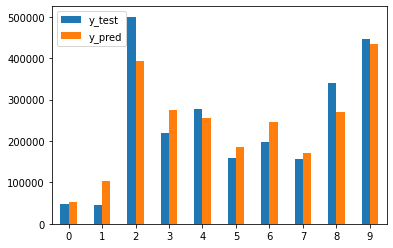

In [11]:
run_forest(150, "sqrt")

#### Classification

- Create classes (low, medium, high) from the target value
- Create and fit a decision tree

<AxesSubplot:>

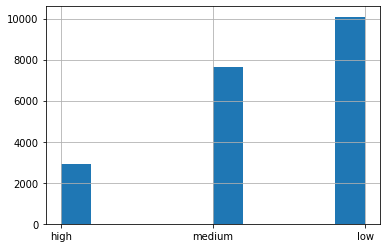

In [12]:
df = preprocess(False) # clean the dataset withtout standardization
# df["median_house_value"].hist()
bins = ["low", "medium", "high"]
df["median_house_value"] = pd.cut(df["median_house_value"], 3, labels=bins)
df["median_house_value"].hist()

In [13]:
from sklearn.metrics import accuracy_score
from sklearn import tree

y = df["median_house_value"] # labels
X = df[["latitude", "longitude", "median_income"]] # consider only some features from the train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # split the dataset

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=42) # initialize the model
clf = clf.fit(X_train, y_train) # train it
housing_predictions = clf.predict(X_test) # predict the cost of houses in the test set
accuracy = accuracy_score(y_test, housing_predictions) # check the error
accuracy

0.7842043452730476

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, housing_predictions, target_names=bins))

              precision    recall  f1-score   support

         low       0.70      0.72      0.71       958
      medium       0.85      0.87      0.86      3303
        high       0.73      0.70      0.72      2551

    accuracy                           0.78      6812
   macro avg       0.76      0.76      0.76      6812
weighted avg       0.78      0.78      0.78      6812



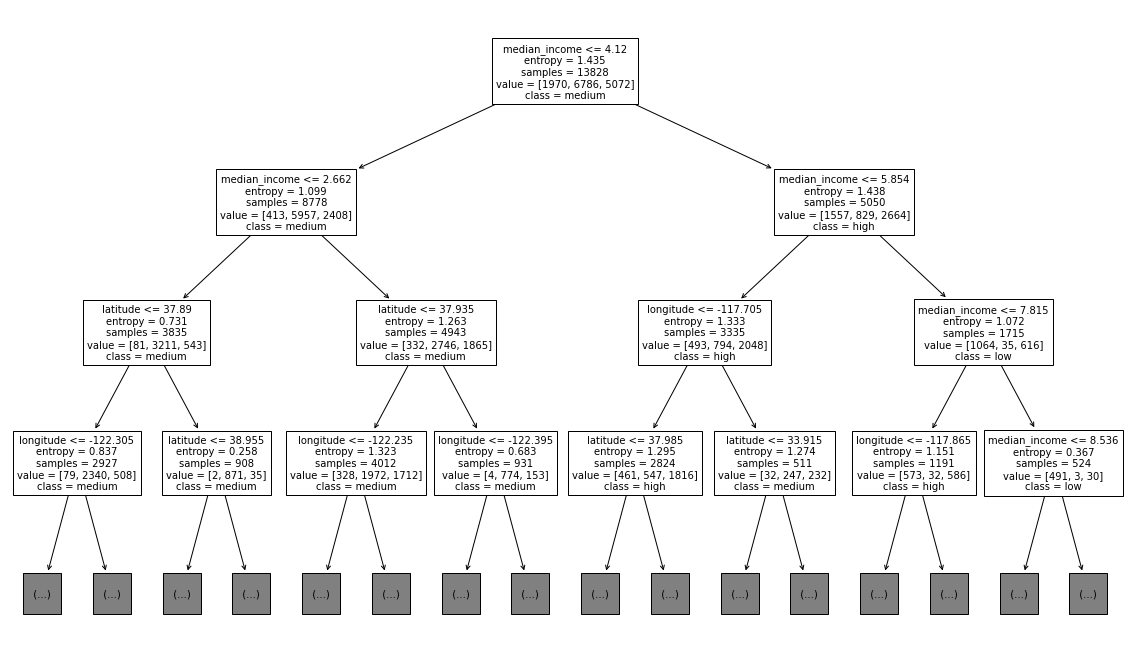

In [15]:
plt.figure(figsize=(20,12))
tree.plot_tree(clf, fontsize=10, feature_names = X_train.columns, class_names=bins, max_depth=3)
plt.show()